# **TensorFlow**
###Sreerag Cheeroth

#Convert Fahrenheit (F) to Celsius (C)
##C =(F-32) *5 / 9 ~ -17.77778+0.555556 F

In [ ]:
TRUE_BIAS = -160.0 / 9.0
TRUE_WEIGHT = 5.0 / 9.0

##Data Preprocessing

In [ ]:
#simulate data set
import tensorflow as tf

samples =1000 #count of samples
input = tf.random.normal(shape=(samples,)) #input feature
noise = tf.random.normal(shape=(samples,))
output = noise + TRUE_BIAS + TRUE_WEIGHT * input



#TF Modeling - Linear Regression

In [ ]:
epochs = 25 # count of iterations
learning_rate = 0.1  #higher learning rate will create exploding gradient issues

In [ ]:
# define model
class Model:
  def __init__(self):
      self.bias = tf.Variable(10.0)
      self.weight = tf.Variable(-10.0)


  def __call__(self,input):
    return self.bias + self.weight * input


In [ ]:
# use mean squared error as loss function
def loss(output, output_pred):
  return tf.reduce_mean(tf.square(output - output_pred))


In [ ]:
#computing the gradient of the model parameter with respect to the loss
def train(model, input, output, learning_rate):
  with tf.GradientTape() as tape:
    current_loss =  loss(output, model(input))

  d_weight, d_bias = tape.gradient(current_loss, [model.weight, model.bias])
  model.bias.assign_sub(learning_rate * d_bias)
  model.weight.assign_sub(learning_rate * d_weight)

In [ ]:
my_model = Model()
biases, weights = [], []
for epoch in range(epochs):
  # eager execution
  biases.append(my_model.bias.numpy())
  weights.append(my_model.weight.numpy())

  current_loss = loss(output, my_model(input))

  train(my_model, input, output, learning_rate)
  if epoch % 10 == 0:
    print('Epoch #', epoch, 'Loss =', current_loss.numpy())
    print('Epoch #%d Loss = %f' % (epoch, current_loss.numpy()))
    print(f'Epoch #{epoch} Loss = {current_loss.numpy()}')

Epoch # 0 Loss = 884.4606
Epoch #0 Loss = 884.460571
Epoch #0 Loss = 884.4605712890625
Epoch # 10 Loss = 10.977137
Epoch #10 Loss = 10.977137
Epoch #10 Loss = 10.977136611938477
Epoch # 20 Loss = 1.0434091
Epoch #20 Loss = 1.043409
Epoch #20 Loss = 1.0434091091156006


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-pack

Text(0.5, 0, 'Iteration (epoch)')

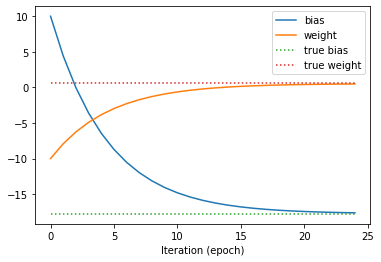

In [ ]:
import seaborn as sns
sns.lineplot(range(epochs), biases, label='bias')
sns.lineplot(range(epochs), weights, label='weight')
sns.lineplot(range(epochs), TRUE_BIAS, linestyle = 'dotted', label ='true bias')
lplot= sns.lineplot(range(epochs), TRUE_WEIGHT, linestyle = 'dotted', label ='true weight')
lplot.set_xlabel('Iteration (epoch)')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


[Text(0.5, 0, 'Fahrenite(F)'), Text(0, 0.5, 'Celcius (C)')]

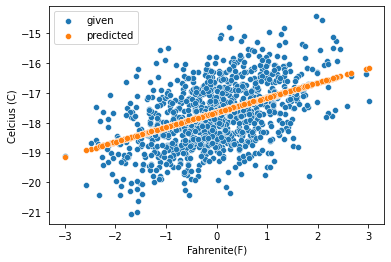

In [ ]:
import seaborn as sn

sn.scatterplot(input, output, label = 'given')
splot =sn.scatterplot(input, my_model(input), label='predicted')
splot.set(xlabel = 'Fahrenite(F)', ylabel='Celcius (C)')